# Handout 03: Neyman-Pearson Lemma

In [1]:
#@title Imports
# !pip install -q symbulate
from symbulate import *

# !pip install tabulate
from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

## Exer 3.2: Improved batting average

### Null distribution: Binomial(5, 0.250)

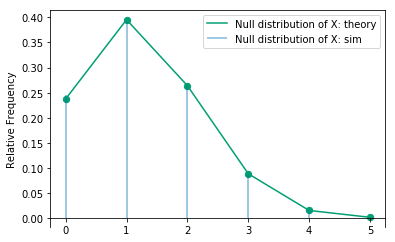

In [2]:
n = 5
p0 = 0.250

P_H0 = Bernoulli(p0) ** n
X_H0 = RV(P_H0, sum)
X_H0.sim(10000).plot()
Binomial(n, p0).plot()
plt.legend(['Null distribution of X: theory',
            'Null distribution of X: sim']);

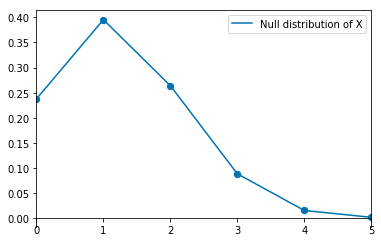

In [3]:
Binomial(n, p0).plot()
plt.legend(['Null distribution of X']);

### Null distribution table

In [4]:
xs = range(n + 1)

print(tabulate({'x': xs,
                'p_0(x)': [Binomial(n, p0).pmf(x) for x in xs]},
               headers = 'keys', floatfmt=".4f"))

  x    p_0(x)
---  --------
  0    0.2373
  1    0.3955
  2    0.2637
  3    0.0879
  4    0.0146
  5    0.0010


### Level $\alpha_0=0.1035$ tests

In [5]:
R = [[3], [4], [5], [3, 4], [3, 5], [4, 5], [3, 4, 5]]

print(tabulate({'Reject H0 if X in': R, 
                'Size': [sum(Binomial(n, p0).pmf(r)) for r in R]},
               headers = 'keys', floatfmt=".4f"))

Reject H0 if X in      Size
-------------------  ------
[3]                  0.0879
[4]                  0.0146
[5]                  0.0010
[3, 4]               0.1025
[3, 5]               0.0889
[4, 5]               0.0156
[3, 4, 5]            0.1035


### Alternative distribution: Binomial(5, 0.333)

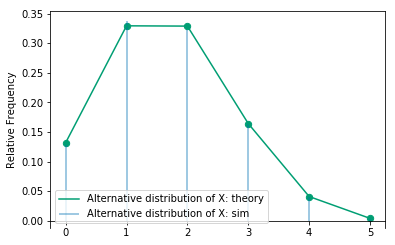

In [6]:
p1 = 0.333

P_H1 = Bernoulli(p1) ** n
X_H1 = RV(P_H1, sum)
X_H1.sim(10000).plot()
Binomial(n, p1).plot()
plt.legend(['Alternative distribution of X: theory',
            'Alternative distribution of X: sim']);

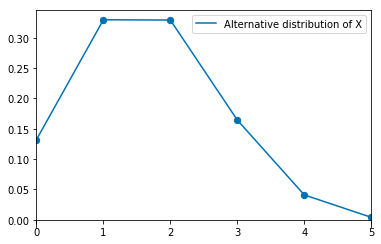

In [7]:
Binomial(n, p1).plot()
plt.legend(['Alternative distribution of X']);

### Alternative distribution table

In [8]:
print(tabulate({'x': xs,
                'p_1(x)': [Binomial(n, p1).pmf(x) for x in xs]},
               headers = 'keys', floatfmt=".4f"))

  x    p_1(x)
---  --------
  0    0.1320
  1    0.3295
  2    0.3291
  3    0.1643
  4    0.0410
  5    0.0041


### Comparison of Null and Alternative Distributions

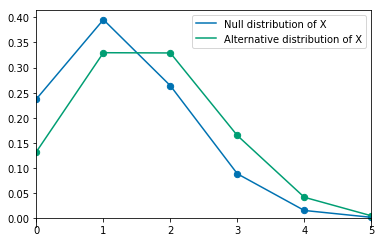

In [9]:
Binomial(n, p0).plot()
Binomial(n, p1).plot()
plt.legend(['Null distribution of X',
           'Alternative distribution of X']);

### Power of level $\alpha_0 = 0.1035$ tests

In [10]:
R = [[3], [4], [5], [3, 4], [3, 5], [4, 5], [3, 4, 5]]

print(tabulate({'Reject H0 if X in': R,
                'Size': [sum(Binomial(n, p0).pmf(r)) for r in R],
                'Power': [sum(Binomial(n, p1).pmf(r)) for r in R]},
               headers = 'keys', floatfmt=".4f"))

Reject H0 if X in      Size    Power
-------------------  ------  -------
[3]                  0.0879   0.1643
[4]                  0.0146   0.0410
[5]                  0.0010   0.0041
[3, 4]               0.1025   0.2053
[3, 5]               0.0889   0.1684
[4, 5]               0.0156   0.0451
[3, 4, 5]            0.1035   0.2094


### Most powerful level $\alpha_0=0.1035$ test

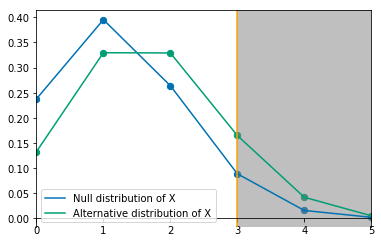

In [11]:
c0 = 3

Binomial(n, p0).plot()
Binomial(n, p1).plot()
plt.legend(['Null distribution of X', 'Alternative distribution of X']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, n, alpha = 0.5, color = 'gray');

### Ratio of likelihoods

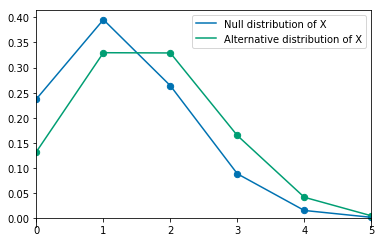

In [12]:
Binomial(n, p0).plot()
Binomial(n, p1).plot()
plt.legend(['Null distribution of X', 'Alternative distribution of X']);

In [13]:
print(tabulate({'x': xs,
                'p_0(x)': [Binomial(n, p0).pmf(x) for x in xs],
                'p_1(x)': [Binomial(n, p1).pmf(x) for x in xs],
                'T(x) = p_1(x) / p_0(x)': [Binomial(n, p1).pmf(x) / Binomial(n, p0).pmf(x) for x in xs]},
               headers = 'keys', floatfmt=".4f"))

  x    p_0(x)    p_1(x)    T(x) = p_1(x) / p_0(x)
---  --------  --------  ------------------------
  0    0.2373    0.1320                    0.5563
  1    0.3955    0.3295                    0.8332
  2    0.2637    0.3291                    1.2480
  3    0.0879    0.1643                    1.8691
  4    0.0146    0.0410                    2.7995
  5    0.0010    0.0041                    4.1930


## Exer 3.3: Mean body temperature

## Comparison of population distribution of individual temperatures under Null and Alternative: $N(\mu, 1)$

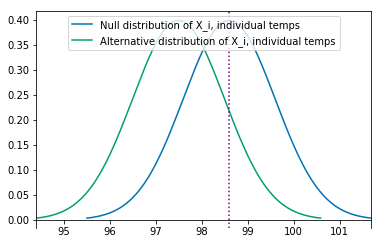

In [14]:
sigma = 1
x0 = 98.6 # indicator for individual temps

mu0 = 98.6
mu1 = 97.5

Normal(mu0, sigma).plot()
Normal(mu1, sigma).plot()

plt.legend(['Null distribution of X_i, individual temps',
           'Alternative distribution of X_i, individual temps'],
           loc = 'upper center');
plt.axvline(x = x0, color = 'purple', ls = ':');

## Test based on $\bar{X}$

### Null distribution of $\bar{X}$: $N(98.6, \frac{1}{\sqrt{4}})$

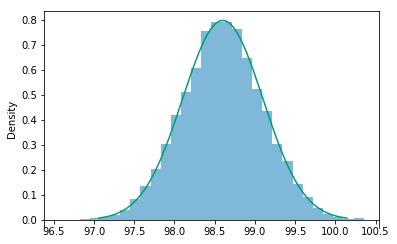

In [15]:
n = 4
sigma = 1

mu0 = 98.6

P_H0 = Normal(mu0, sigma) ** n
Xbar_H0 = RV(P_H0, mean).sim(10000).plot()
Normal(mu0, sigma / sqrt(n)).plot()

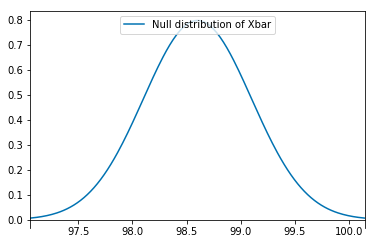

In [16]:
Normal(mu0, sigma / sqrt(n)).plot()
plt.legend(['Null distribution of Xbar'],
          loc = 'upper center');

### Size $\alpha_0=0.0625$ test based on $\bar{X}$

In [17]:
alpha0 = 0.0625 

Normal(0, 1).quantile(alpha0)

-1.5341205443525463

In [18]:
98.6 - 1.534 * 1 / sqrt(4)

97.833

In [19]:

c0 = Normal(mu0, sigma / sqrt(n)).quantile(alpha0)
c0, Normal(mu0, sigma / sqrt(n)).cdf(c0)

(97.83293972782373, 0.0625000000000017)

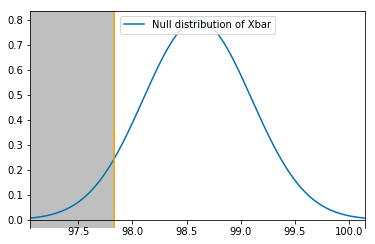

In [20]:
Normal(mu0, sigma / sqrt(n)).plot()

plt.legend(['Null distribution of Xbar'],
          loc = 'upper center');
plt.axvline(x = c0, color = 'orange');
plt.axvspan(90, c0, alpha = 0.5, color = 'gray');

### Alternative distribution of $\bar{X}$: $N(97.5, \frac{1}{\sqrt{4}})$

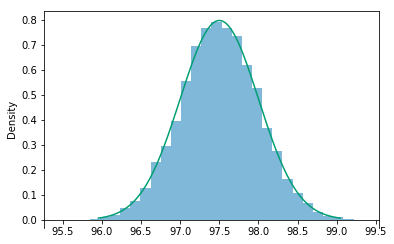

In [21]:
mu1 = 97.5

P_H1 = Normal(mu1, sigma) ** n
Xbar_H1 = RV(P_H1, mean).sim(10000).plot()
Normal(mu1, sigma / sqrt(n)).plot()

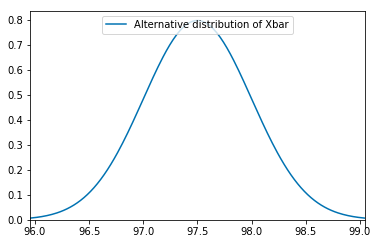

In [22]:
Normal(mu1, sigma / sqrt(n)).plot()
plt.legend(['Alternative distribution of Xbar'],
          loc = 'upper center');

### Power of size $\alpha_0=0.0625$ test based on $\bar{X}$

In [23]:
(97.83 - 97.5) / 0.5

0.6599999999999966

In [24]:
Normal().cdf(0.66)

0.7453730853286639

In [25]:
Normal(mu1, sigma / sqrt(n)).cdf(c0)

0.747255923490067

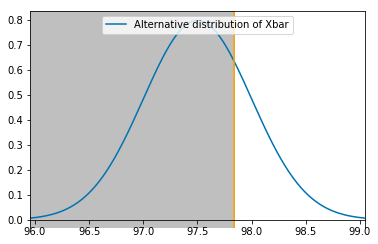

In [26]:
Normal(mu1, sigma / sqrt(n)).plot()

plt.legend(['Alternative distribution of Xbar'],
          loc = 'upper center');
plt.axvline(x = c0, color = 'orange');
plt.axvspan(90, c0, alpha = 0.5, color = 'gray');

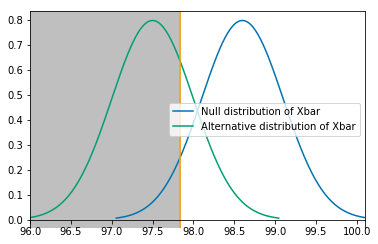

In [27]:
Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(mu1 - 3 * sigma / sqrt(n), mu0 + 3 * sigma / sqrt(n))
plt.legend(['Null distribution of Xbar', 'Alternative distribution of Xbar']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(90, c0, alpha = 0.5, color = 'gray');

## Test based on $N$, sample count of temperatures below 98.6

### Null distribution of $X_i$, individual temperatures

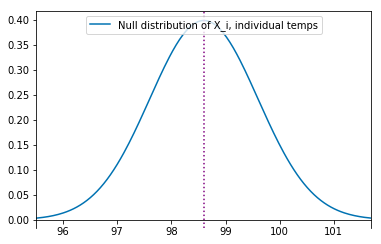

In [28]:
sigma = 1
x0 = 98.6 # indicator for individual temps

mu0 = 98.6

Normal(mu0, sigma).plot()

plt.legend(['Null distribution of X_i, individual temps'],
           loc = 'upper center');
plt.axvline(x = x0, color = 'purple', ls = ':');

### Null probability that any individual temp is less than 98.6

In [29]:
p0 = Normal(mu0, sigma).cdf(x0)
p0

0.5

### Null distribution of $N$: Binomial(4, 0.5)

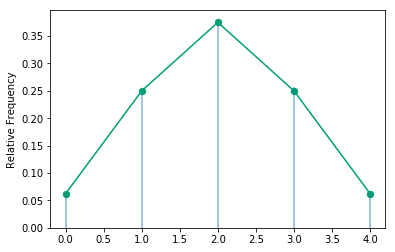

In [30]:
n = 4

P_H0 = Normal(mu0, sigma) ** n
N_H0 = RV(P_H0, count_lt(x0)).sim(10000).plot()
Binomial(n, p0).plot()

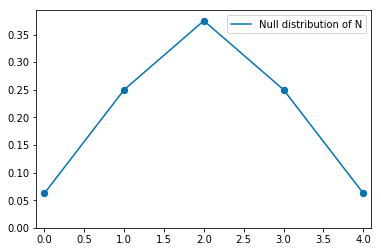

In [31]:
Binomial(n, p0).plot()
plt.legend(['Null distribution of N']);
plt.xlim(0 - 0.1, n + 0.1);

### Size $\alpha_0=0.0625$ test based on $N$

In [32]:
alpha0 = 0.0625

c0 = 4

c0, Binomial(n, p0).pmf(c0)

(4, 0.0625)

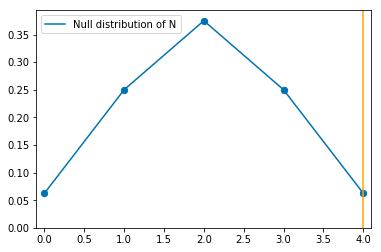

In [33]:
Binomial(n, p0).plot()

plt.legend(['Null distribution of N']);
plt.xlim(0 - 0.1, n + 0.1);
plt.axvline(x = c0, color = 'orange');

### Alternative distribution of $X_i$, individual temperatures

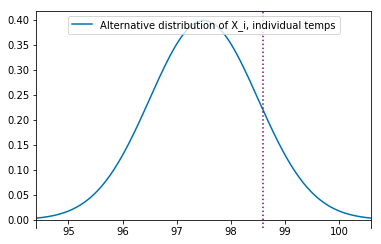

In [34]:
mu1 = 97.5

Normal(mu1, sigma).plot()

plt.legend(['Alternative distribution of X_i, individual temps'],
           loc = 'upper center');
plt.axvline(x = x0, color = 'purple', ls = ':');

### Alternative probability that any individual temp is less than 98.6

In [35]:
p1 = Normal(mu1, sigma).cdf(x0)
p1

0.8643339390536161

### Alternative distribution of $N$: Bin(4, 0.864)

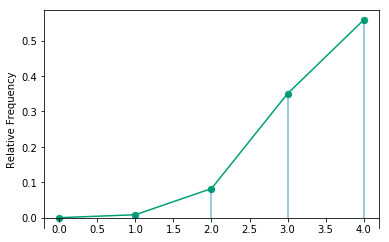

In [36]:
n = 4

P_H1 = Normal(mu1, sigma) ** n
N_H1 = RV(P_H1, count_lt(x0)).sim(10000).plot()
Binomial(n, p1).plot()

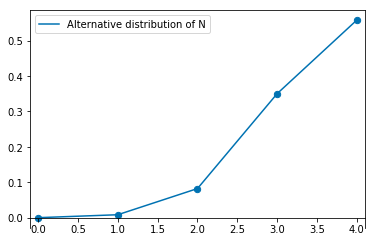

In [37]:
Binomial(n, p1).plot()
plt.legend(['Alternative distribution of N']);
plt.xlim(0 - 0.1, n + 0.1);

### Power of size $\alpha_0=0.0625$ test based on $N$

In [38]:
Binomial(n, p1).pmf(c0)

0.5581183037028328

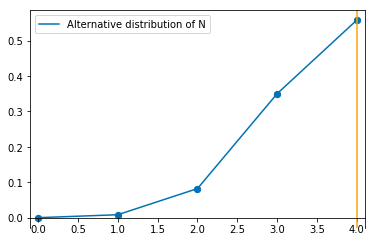

In [39]:
Binomial(n, p1).plot()

plt.legend(['Alternative distribution of N']);
plt.xlim(0 - 0.1, n + 0.1);
plt.axvline(x = c0, color = 'orange');

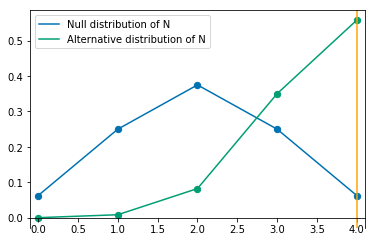

In [40]:
Binomial(n, p0).plot()
Binomial(n, p1).plot()

plt.xlim(0 - 0.1, n + 0.1);
plt.legend(['Null distribution of N', 'Alternative distribution of N']);
plt.axvline(x = c0, color = 'orange');

### Exer 3.5 illustration: $\mu_1 > \mu_0$

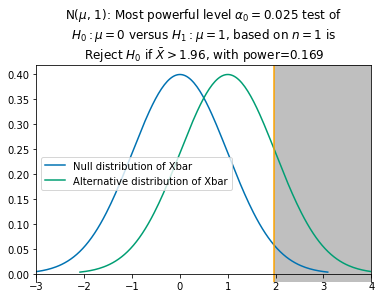

In [41]:
n = 1
sigma = 1

mu0 = 0
mu1 = 1

alpha0 = 0.025
c0 = Normal(mu0, sigma / sqrt(n)).quantile(1 - alpha0)

power = 1 - Normal(mu1, sigma / sqrt(n)).cdf(c0)

Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(mu0 - 3 * sigma / sqrt(n), mu1 + 3 * sigma / sqrt(n))
plt.legend(['Null distribution of Xbar',
            'Alternative distribution of Xbar']);
plt.axvline(x = c0, color = 'orange');
plt.axvspan(c0, mu1 + 3 * sigma / sqrt(n), alpha = 0.5, color = 'gray');
plt.title(r"N($\mu$, %s): " % sigma +
          r"Most powerful level $\alpha_0=%s$ test of" % alpha0 + "\n" +
          r"$H_0:\mu=%s$" % mu0 +
          r" versus $H_1:\mu=%s$" % mu1 + 
          r", based on $n=%s$ is" % n + "\n" +
          r"Reject $H_0$ if $\bar{X} > %s$" % round(c0, 3) +
          r", with power=%s" % round(power, 3));

In [42]:
from ipywidgets import interactive
import ipywidgets as widgets

def f(mu0, mu1, sigma, n, alpha0):
    c0 = Normal(mu0, sigma / sqrt(n)).quantile(1 - alpha0)
    power = 1 - Normal(mu1, sigma / sqrt(n)).cdf(c0)
    
    Normal(mu0, sigma / sqrt(n)).plot()
    Normal(mu1, sigma / sqrt(n)).plot()
    
    plt.xlim(mu0 - 3 * sigma / sqrt(n),
             mu1 + 3 * sigma / sqrt(n))
    plt.legend(['Null distribution of Xbar',
                'Alternative distribution of Xbar']);
    plt.axvline(x = c0, color = 'orange');
    plt.axvspan(c0, mu1 + 3 * sigma / sqrt(n),
                alpha = 0.5, color = 'gray');
    plt.title(r"N($\mu$, %s): " % sigma +
              r"Most powerful level $\alpha_0=%s$ test of" % alpha0 +
              "\n" +
              r"$H_0:\mu=%s$" % mu0 +
              r" versus $H_1:\mu=%s$" % mu1 +
              r", based on $n=%s$ is" % n + "\n" +
              r"Reject $H_0$ if $\bar{X} > %s$" % round(c0, 3) +
              r", with power=%s" % round(power, 3));

    
interactive_plot = interactive(f,
                               mu0=widgets.FloatSlider(value=0, max=10, min=-10),
                               mu1=widgets.FloatSlider(value=1, max=10, min=-10),
                               sigma=widgets.FloatSlider(value=1, max=10, min=0.01),
                               n=widgets.IntSlider(value=1, max=50, min=1),
                              alpha0=widgets.FloatSlider(value=0.05, max=0.10, min=0.005, step=0.005),)
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot



interactive(children=(FloatSlider(value=0.0, description='mu0', max=10.0, min=-10.0), FloatSlider(value=1.0, d…